#  Latency regression analysis (statistical methods)
______________________________________________________________

## Baseline:
### - Motivation & Setup
### - Current technic
### - New approach
### - Usage
________________________________________________________________


## Motivation & Setup

Find statisticaly reliable methods to catch changes in latency profiles. 

Objects to compare: Millions of end-to-end latencies of Cassandra db setup on different Zing and Oracle VM. 

Problems: very large noise level

<img src = 'DHG_1.png'>

___________________________________________________________

## Current technic

- 3 runs for each JVM
- Calculate percentiles values
- Compare them by sight

What is percentile value?
<img src = 'perc.png'>
<img src = 'perc2.png'>

<img src = 'GHDperc_c_1.png'>

<img src = 'DevGran.png'>

#### +:
- We see how the distribution behaves around different latency values

#### - :
- Not very reliable
__________________

## New approach

#### Understand how percentiles behave and compare them using statisticaly reliable approach.

We expect:
- Percentiles distributions of different VM are different if VM's perform different
- Percentiles distributions are same if VM's perform same way
- Percentiles values of exact VM usually have some "bell-shaped" distribution, if not, than VM performance is probably unstable

Use Kolmogorov-Smirnov test to understand if the percentiles disturbed the same way

In [1]:
from comparer import *
%matplotlib inline

KS_test results gives probability that two percentiles samples are generated from the same distribution. 
If this value equals p, that means we cant reject the hypothesis that they are drown from equal distributions on 1-p level
percentile value: 50
first group mean and std: 305.6, 3.38230690506
second group mean and std: 320.333333333, 2.35702260396
number of data points to compare: 10, 9
Probability of being drown from different distr.: 0.999967144508
---------------------------------------------------------------
percentile value: 90
first group mean and std: 377.2, 2.6
second group mean and std: 388.1, 2.38537208838
number of data points to compare: 10, 10
Probability of being drown from different distr.: 0.999981120206
---------------------------------------------------------------
percentile value: 99
first group mean and std: 448.555555556, 4.59736908124
second group mean and std: 462.0, 2.93257565972
number of data points to compare: 9, 10
Probability of being drown from differ

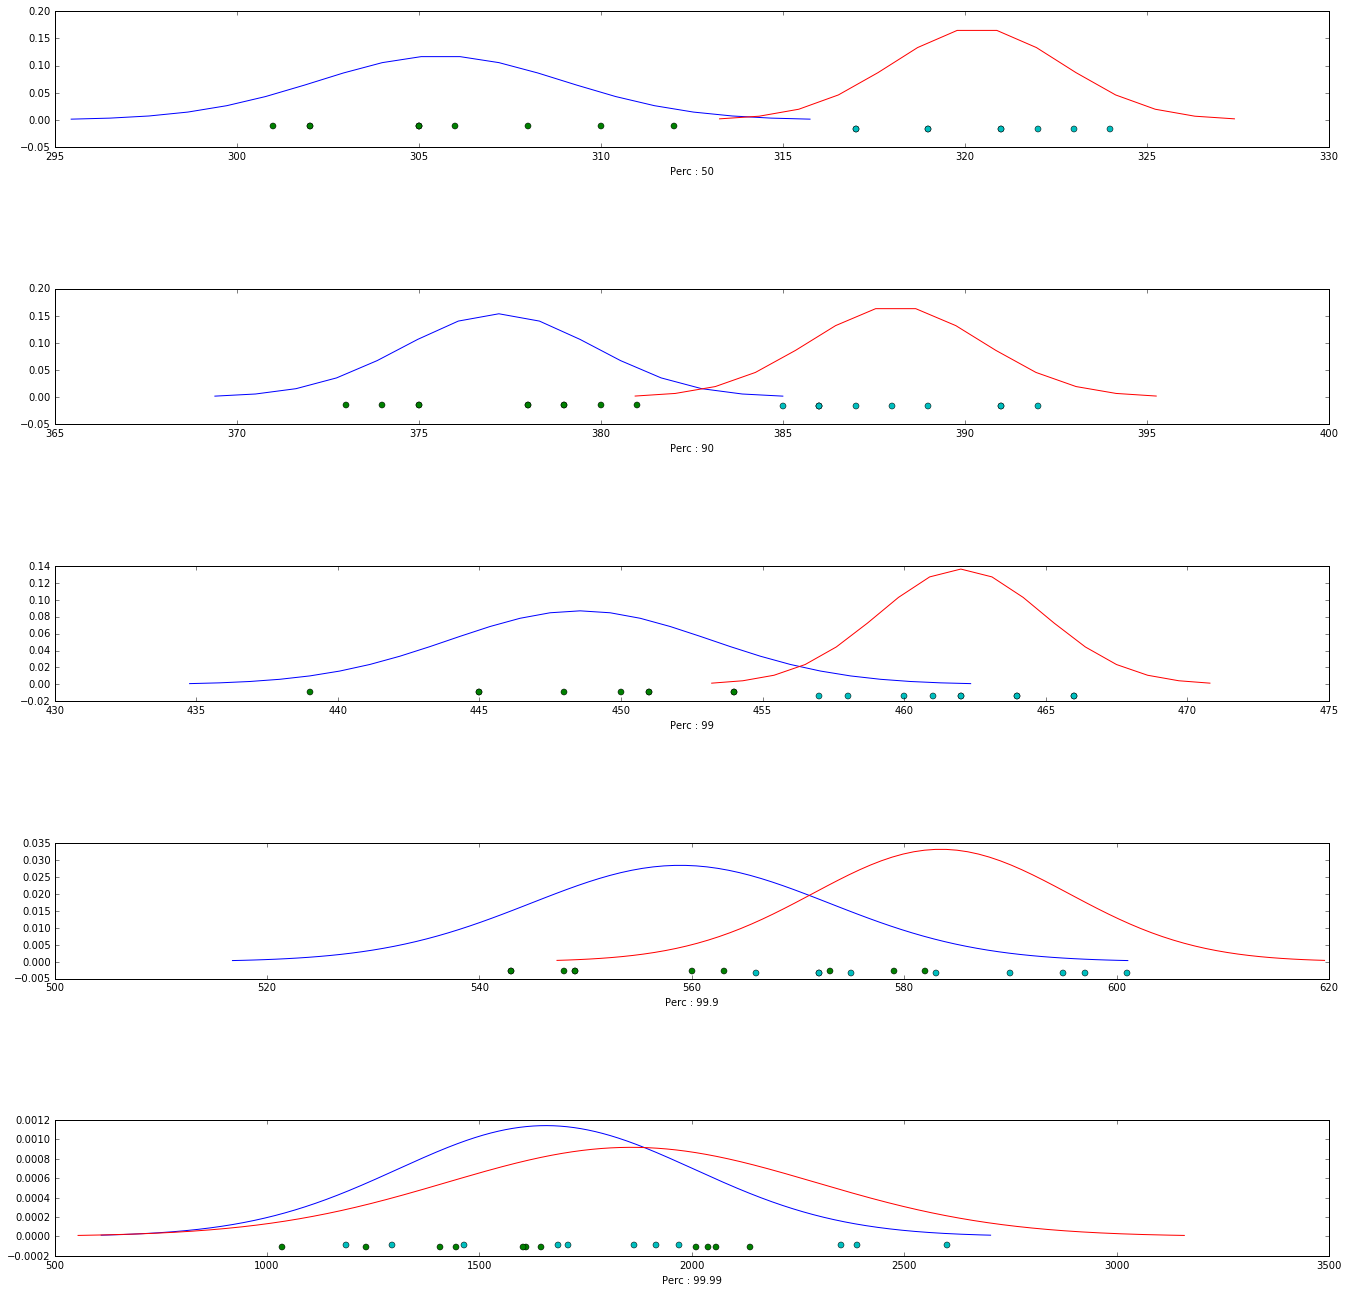

In [2]:
args = parse_args('-if /home/anton/azul/New_config_latency_runs/Dev_over_2 /home/anton/azul/New_config_latency_runs/Highlander_over_2 -rq READ ')
    
if check_folders(args.input_folders):
    first_all_data = whole_cycle(args, args.input_folders[0])
    second_all_data = whole_cycle(args, args.input_folders[1])

    ks_test_resuts = ks_tests(first_all_data['cleared_percentiles_dict'], second_all_data['cleared_percentiles_dict'])
    print_results(first_all_data, second_all_data, ks_test_resuts)

    plot_all(first_all_data, second_all_data)

In [ ]:
%matplotlib qt

## Usage

###  